This script runs analyses on the behavioral data.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
parent_dir = '../data/behavior/'
data_filename = os.path.join(parent_dir,'all_data_beatpadding=0')
output_filepath = os.path.join(parent_dir,'analysis')
figure_output_filepath = '../figures/behavior/'

In [3]:
conds = ['I','8B','2B','1B']
reps = ['rep1','rep2','rep3']
groups = ['AM','M']

In [4]:
# import data as big DataFrame
df = pd.read_csv(data_filename, index_col=0)
print(df)

    cond   rep   sub group         1         2         3         4         5  \
0      I  rep1  s103    AM  1.000000  1.000000  0.857143  0.750000  0.500000   
1      I  rep1  s105     M  1.000000  1.000000  0.857143  0.875000  0.500000   
2      I  rep1  s108     M  1.000000  1.000000  1.000000  0.750000  0.500000   
3      I  rep1  s115    AM  1.000000  1.000000  0.857143  0.750000  0.750000   
4      I  rep1  s117     M  1.000000  1.000000  0.857143  0.750000  0.500000   
..   ...   ...   ...   ...       ...       ...       ...       ...       ...   
103   1B  rep3  s117     M  0.666667  0.500000  0.900000  0.666667  1.000000   
104   1B  rep3  s120    AM  1.000000  0.500000  0.600000  0.666667  0.000000   
105   1B  rep3  s121     M  1.000000  0.833333  1.000000  0.833333  0.333333   
106   1B  rep3  s123    AM  1.000000  0.833333  0.900000  0.833333  0.000000   
107   1B  rep3  s122     M  0.666667  0.666667  0.700000  0.833333  0.000000   

        6  ...       231   232       23

In [12]:
print(df.mean(axis=1))

0      0.664461
1      0.643633
2      0.593559
3      0.738577
4      0.660016
         ...   
103    0.657354
104    0.567613
105    0.662261
106    0.662303
107    0.643929
Length: 108, dtype: float64


In [5]:
df_mean = df.assign(mean=df.mean(axis=1))
df_mean

,cond,rep,sub,group,1,2,3,4,5,6,...,232,233,234,235,236,237,238,239,240,mean
0,I,rep1,s103,AM,1.000000,1.000000,0.857143,0.750000,0.500000,0.75,...,0.60,1.000000,1.000000,1.000,1.000000,0.400000,0.714286,0.375000,0.750000,0.664461
1,I,rep1,s105,M,1.000000,1.000000,0.857143,0.875000,0.500000,0.50,...,0.40,0.600000,0.833333,0.500,0.857143,1.000000,0.142857,0.375000,0.750000,0.643633
2,I,rep1,s108,M,1.000000,1.000000,1.000000,0.750000,0.500000,0.75,...,0.60,0.600000,0.833333,0.875,0.857143,0.400000,0.285714,0.375000,0.750000,0.593559
3,I,rep1,s115,AM,1.000000,1.000000,0.857143,0.750000,0.750000,1.00,...,0.80,1.000000,0.833333,0.750,0.857143,0.400000,0.714286,0.375000,0.750000,0.738577
4,I,rep1,s117,M,1.000000,1.000000,0.857143,0.750000,0.500000,0.75,...,0.40,0.600000,0.666667,0.250,0.714286,1.000000,0.571429,0.625000,0.750000,0.660016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1B,rep3,s117,M,0.666667,0.500000,0.900000,0.666667,1.000000,1.00,...,0.75,0.714286,0.500000,0.800,0.750000,0.142857,0.333333,0.571429,0.666667,0.657354
104,1B,rep3,s120,AM,1.000000,0.500000,0.600000,0.666667,0.000000,1.00,...,0.75,0.714286,0.333333,0.800,0.875000,0.714286,0.666667,0.571429,1.000000,0.567613
105,1B,rep3,s121,M,1.000000,0.833333,1.000000,0.833333,0.333333,1.00,...,0.75,0.571429,0.500000,0.800,1.000000,1.000000,0.833333,0.571429,1.000000,0.662261
106,1B,rep3,s123,AM,1.000000,0.833333,0.900000,0.833333,0.000000,1.00,...,0.75,0.857143,0.333333,0.800,0.750000,0.857143,0.666667,0.571429,0.666667,0.662303


In [6]:
df_mean = df_mean[['cond','rep','sub','group','mean']]
df_mean

,cond,rep,sub,group,mean
0,I,rep1,s103,AM,0.664461
1,I,rep1,s105,M,0.643633
2,I,rep1,s108,M,0.593559
3,I,rep1,s115,AM,0.738577
4,I,rep1,s117,M,0.660016
...,...,...,...,...,...
103,1B,rep3,s117,M,0.657354
104,1B,rep3,s120,AM,0.567613
105,1B,rep3,s121,M,0.662261
106,1B,rep3,s123,AM,0.662303


In [26]:
overall_AM_mean = df_mean.loc[df_mean['group']=='AM']['mean'].mean()
overall_M_mean = df_mean.loc[df_mean['group']=='M']['mean'].mean()
print(overall_AM_mean,overall_M_mean)

0.6768082491389782 0.6721235868683785


In [7]:
df_AM = df_mean.loc[df_mean['group']=='AM']
df_M = df_mean.loc[df_mean['group']=='M']

In [34]:
# plot the mean and SD of accuracy for each condition
mean_array = np.zeros((len(conds),2))
std_array = np.zeros((len(conds),2))

for c in range(len(conds)):
    cond = conds[c]
    mean_array[c,0] = df_AM.loc[df_mean['cond']==cond]['mean'].mean()
    std_array[c,0] = df_AM.loc[df_mean['cond']==cond]['mean'].std()
    mean_array[c,1] = df_M.loc[df_mean['cond']==cond]['mean'].mean()
    std_array[c,1] = df_M.loc[df_mean['cond']==cond]['mean'].std()

In [35]:
means = pd.DataFrame(data=mean_array,index=conds,columns=groups)
errors = pd.DataFrame(data=std_array,index=conds,columns=groups)
means

,AM,M
I,0.690647,0.680309
8B,0.701182,0.682359
2B,0.661282,0.678597
1B,0.654122,0.647229


In [60]:
ebar_help = np.vstack((np.zeros(len(means['AM'])),errors['AM']))
print(ebar_help)

[[0.         0.         0.         0.        ]
 [0.05950798 0.05486442 0.09013393 0.05757466]]


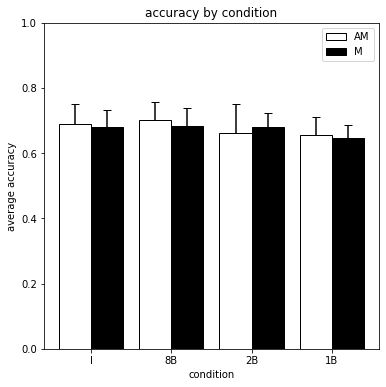

In [64]:
fig,ax = plt.subplots(figsize=(6,6))
#means.plot.bar(yerr=errors, ax=ax, rot=0, fill=[True,False])
width = 0.4
ax.bar(range(len(conds)),means['AM'],width=-width,align='edge',label='AM',
       yerr=ebar_help,color='white',edgecolor='black',ecolor='black',capsize=4)
ax.bar(range(len(conds)),means['M'],width=width,align='edge',label='M',
       yerr=errors['M'],color='black',edgecolor='black',ecolor='black',capsize=4)

ax.set_xticks(range(len(conds)))
ax.set_xticklabels(conds)
ax.set_ylim(0,1)
ax.set_xlabel('condition')
ax.set_ylabel('average accuracy')
ax.legend()
ax.set_title('accuracy by condition')
plt.savefig(figure_output_filepath+'accuracy_by_cond_bw',dpi=300);

In [55]:
plt.clf()

<Figure size 432x288 with 0 Axes>

AM and M subjects appear to be roughly the same.

In [8]:
# plot the mean and SD for each rep, averaged over subjects 
mean_array = np.zeros((len(conds),len(reps)))
std_array = np.zeros((len(conds),len(reps)))

for c in range(len(conds)):
    cond = conds[c]
    this_cond_df = df_mean.loc[df_mean['cond']==cond]
    
    for r in range(len(reps)):
        rep = reps[r]
        
        mean_array[c,r] = this_cond_df.loc[this_cond_df['rep']==rep]['mean'].mean()
        std_array[c,r] = this_cond_df.loc[this_cond_df['rep']==rep]['mean'].std()

In [9]:
means = pd.DataFrame(data=mean_array.T,index=reps,columns=conds)
errors = pd.DataFrame(data=std_array.T,index=reps,columns=conds)
means

,I,8B,2B,1B
rep1,0.649863,0.658267,0.635134,0.625974
rep2,0.698463,0.698968,0.684531,0.661363
rep3,0.706385,0.714938,0.693040,0.663542


In [12]:
#colors = ['C0','C4','C3','C1']
colors = ['C0','C5','C4','black']
linestyles = ['solid','dashed','dashdot','dotted']

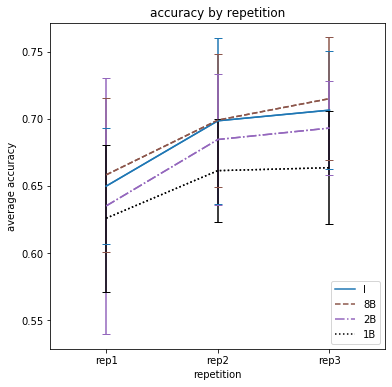

In [13]:
fig,ax = plt.subplots(figsize=(6,6))
#means.plot(yerr=errors,capsize=4,ax=ax,xlim=(-0.5,2.5),style=linestyles)
for c in range(len(conds)):
    cond = conds[c]
    ax.plot(means[cond],linestyle=linestyles[c],color=colors[c],label=cond)
    ax.errorbar(range(len(reps)),means[cond],yerr=errors[cond],linestyle=linestyles[c],color=colors[c],capsize=4)
ax.set_xlim(-0.5,2.5)
ax.set_xlabel('repetition')
ax.set_ylabel('average accuracy')
ax.legend(loc='lower right')
ax.set_title('accuracy by repetition')
plt.savefig(figure_output_filepath+'accuracy_by_rep_ls-neutral',dpi=300);